In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
data = pd.read_csv("C://Users//Megha Deepika//Desktop//Mind Tree//FlightDelays.csv")

In [32]:
data.head()

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


In [33]:
data.isnull().sum()

schedtime       0
carrier         0
deptime         0
dest            0
distance        0
date            0
flightnumber    0
origin          0
weather         0
dayweek         0
daymonth        0
tailnu          0
delay           0
dtype: int64

In [34]:
data.shape

(2201, 13)

In [35]:
data.dest.value_counts()

LGA    1150
EWR     665
JFK     386
Name: dest, dtype: int64

In [36]:
data.columns

Index(['schedtime', 'carrier', 'deptime', 'dest', 'distance', 'date',
       'flightnumber', 'origin', 'weather', 'dayweek', 'daymonth', 'tailnu',
       'delay'],
      dtype='object')

In [37]:
data.dtypes

schedtime        int64
carrier         object
deptime          int64
dest            object
distance         int64
date            object
flightnumber     int64
origin          object
weather          int64
dayweek          int64
daymonth         int64
tailnu          object
delay           object
dtype: object

In [38]:
#Replace target variable
data['delay'].replace('ontime', 1,inplace=True) 
data['delay'].replace('delayed', 0,inplace=True) 


In [39]:
data.delay.value_counts(normalize=True)

1    0.805543
0    0.194457
Name: delay, dtype: float64

In [40]:
def unique_counts(d):
    for i in d.columns:
        count = data[i].nunique()
        print(i, ": ", count)     

In [41]:
unique_counts(data)

schedtime :  59
carrier :  8
deptime :  633
dest :  3
distance :  7
date :  31
flightnumber :  103
origin :  3
weather :  2
dayweek :  7
daymonth :  31
tailnu :  549
delay :  2


In [42]:
data.shape

(2201, 13)

In [43]:
#categorical-carrier,dest,date,origin,tailnu,delay

In [44]:
data['deptime'] = pd.to_datetime(data['deptime'])

In [45]:
data.dtypes

schedtime                int64
carrier                 object
deptime         datetime64[ns]
dest                    object
distance                 int64
date                    object
flightnumber             int64
origin                  object
weather                  int64
dayweek                  int64
daymonth                 int64
tailnu                  object
delay                    int64
dtype: object

## |Univariate Analysis

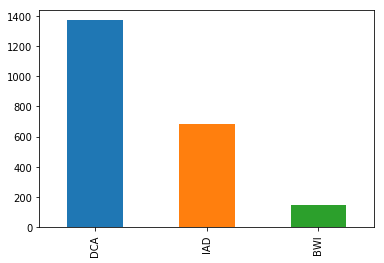

In [46]:
data["origin"].value_counts().plot.bar()


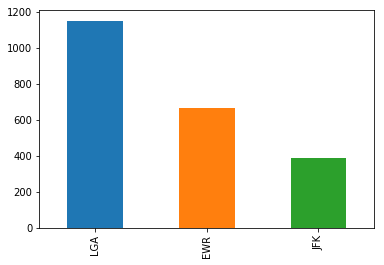

In [47]:
data["dest"].value_counts().plot.bar()

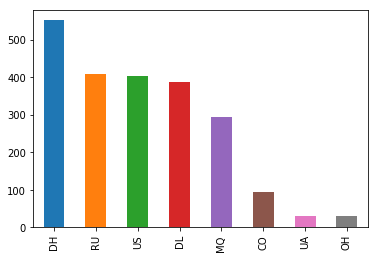

In [48]:
data["carrier"].value_counts().plot.bar()

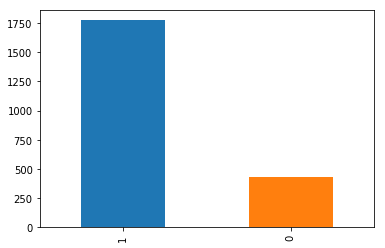

In [49]:
data["delay"].value_counts().plot.bar()

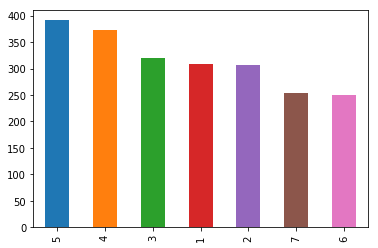

In [50]:
data["dayweek"].value_counts().plot.bar()

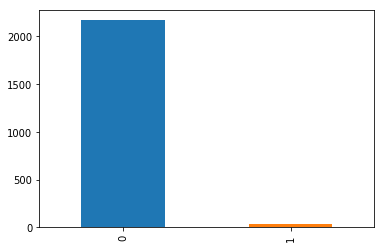

In [51]:
data["weather"].value_counts().plot.bar()

## Bi variate Analysis

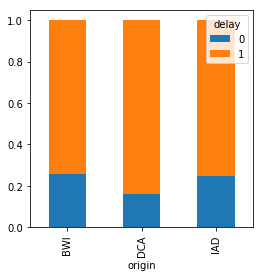

In [52]:
loca=pd.crosstab(data['origin'],data['delay'])
loca
loca.div(loca.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) #BWI and IAD has more delay

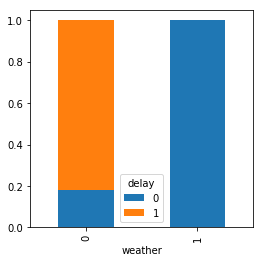

In [53]:
loca=pd.crosstab(data['weather'],data['delay'])
loca
loca.div(loca.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) #80% of delay is due to weather

In [54]:
data["day_of_week"] = 0

In [55]:
data["day_of_week"][(data["dayweek"]==1) | (data["dayweek"]==7)]=1

C:\Users\Megha Deepika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
data["day_of_week"].value_counts()

0    1640
1     561
Name: day_of_week, dtype: int64

In [57]:
data['dayweek'].value_counts()

5    391
4    372
3    320
1    308
2    307
7    253
6    250
Name: dayweek, dtype: int64

In [58]:
data['sched']=np.round(data['schedtime']/100,0)

In [59]:
data.head()

,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay,day_of_week,sched
0,1455,OH,1970-01-01 00:00:00.000001455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,1,0,15.0
1,1640,DH,1970-01-01 00:00:00.000001640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,1,0,16.0
2,1245,DH,1970-01-01 00:00:00.000001245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,1,0,12.0
3,1715,DH,1970-01-01 00:00:00.000001709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,1,0,17.0
4,1039,DH,1970-01-01 00:00:00.000001035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,1,0,10.0


In [60]:
data['sched'] = data['sched'].astype(int)

In [61]:
data.dtypes

schedtime                int64
carrier                 object
deptime         datetime64[ns]
dest                    object
distance                 int64
date                    object
flightnumber             int64
origin                  object
weather                  int64
dayweek                  int64
daymonth                 int64
tailnu                  object
delay                    int64
day_of_week              int64
sched                    int32
dtype: object

In [62]:
data_new = data.drop(columns=['schedtime','deptime','date','flightnumber','daymonth','tailnu','dayweek'])

In [63]:
data_new.head()

,carrier,dest,distance,origin,weather,delay,day_of_week,sched
0,OH,JFK,184,BWI,0,1,0,15
1,DH,JFK,213,DCA,0,1,0,16
2,DH,LGA,229,IAD,0,1,0,12
3,DH,LGA,229,IAD,0,1,0,17
4,DH,LGA,229,IAD,0,1,0,10


In [64]:
x = data_new.drop(columns = ['delay'])

In [65]:
x.head()

,carrier,dest,distance,origin,weather,day_of_week,sched
0,OH,JFK,184,BWI,0,0,15
1,DH,JFK,213,DCA,0,0,16
2,DH,LGA,229,IAD,0,0,12
3,DH,LGA,229,IAD,0,0,17
4,DH,LGA,229,IAD,0,0,10


In [66]:
y = data_new['delay']

In [67]:
columns= ['carrier','dest', 'origin']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in columns:
     x[i]=le.fit_transform(x[i])

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=25)

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score

In [71]:
predict = lr.predict(x_test)

In [72]:
accuracy_score(predict,y_test)

0.8257713248638838

In [73]:
confusion_matrix(predict,y_test)

array([[ 12,   0],
       [ 96, 443]], dtype=int64)

In [74]:
roc_auc_score(predict,y_test)

0.9109461966604824

In [75]:
f1_score(predict,y_test)

0.9022403258655805

In [76]:
data_new['delay'].value_counts(1)

1    0.805543
0    0.194457
Name: delay, dtype: float64

## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(x_train,y_train)
y_pred = rfm.predict(x_test)

C:\Users\Megha Deepika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [78]:
accuracy_score(y_pred,y_test)

0.8112522686025408

In [79]:
confusion_matrix(y_pred,y_test)

array([[ 25,  21],
       [ 83, 422]], dtype=int64)

In [80]:
f1_score(y_pred,y_test)

0.8902953586497891

## SVM

In [81]:
from sklearn.svm import SVC

In [82]:
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
predict = svm.predict(x_test)

In [84]:
accuracy_score(predict,y_test)

0.8257713248638838

In [85]:
f1_score(predict,y_test)

0.9022403258655805